In [23]:
import pandas as pd

import plotly.graph_objects as go

import plotly.express as px

import plotly.figure_factory as ff
import plotly.io as pio
import os

In [24]:
file_path=r'D:\JupyterCode\MyQuantFinProject\Data\RangeCrypto\BNBX_30Pst_070622.csv'

#file_path=r'D:\JupyterCode\MyQuantFinProject\Data\RangeCrypto\ETH_Range_050622_30Past_15R.csv'

root_report_path='D:\JupyterCode\MyQuantFinProject\Report'

In [25]:
symbol=(os.path.split(file_path)[1]).split('_')[0]
print(symbol)
#symbol="ETH"

folder_report = os.path.splitext((os.path.split(file_path)[1]))[0]
print(file_path)
print(folder_report)

report_path=os.path.join(root_report_path,folder_report)
print(report_path)

BNBX
D:\JupyterCode\MyQuantFinProject\Data\RangeCrypto\BNBX_30Pst_070622.csv
BNBX_30Pst_070622
D:\JupyterCode\MyQuantFinProject\Report\BNBX_30Pst_070622


In [26]:
range_df=pd.read_csv(file_path,index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
range_df.info()
range_df.drop(columns='Ticker',inplace=True)

list_cols=list(range_df.columns)


#Cut only interval looking
fromDate='2022-01-25';
toDate='2022-06';

if fromDate!='' and toDate!='':
 df=range_df[fromDate:toDate]
else:
 df=range_df


df.head(10)
#df.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2022-05-09 to 2022-06-07
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ticker        30 non-null     object 
 1   _XHH15        30 non-null     float64
 2   _XLL15        30 non-null     float64
 3   _XMid15       30 non-null     float64
 4   Range15       30 non-null     float64
 5   _PctX_HtoL15  30 non-null     float64
 6   _PctX_LtoH15  30 non-null     float64
 7   _PctMidToH15  30 non-null     float64
 8   _PctMidToL15  30 non-null     float64
 9   Close         30 non-null     float64
 10  Volume        30 non-null     float64
dtypes: float64(10), object(1)
memory usage: 2.8+ KB


,_XHH15,_XLL15,_XMid15,Range15,_PctX_HtoL15,_PctX_LtoH15,_PctMidToH15,_PctMidToL15,Close,Volume
Date/Time,,,,,,,,,,
2022-05-09,407.1,355.9,381.50,51.2,-12.58,14.39,6.71,-6.71,296.1,2137566.75
2022-05-10,407.1,296.1,351.60,111.0,-27.27,37.49,15.78,-15.78,319.1,2160654.25
2022-05-11,407.1,296.1,351.60,111.0,-27.27,37.49,15.78,-15.78,271.5,3387754.00
2022-05-12,407.1,271.5,339.30,135.6,-33.31,49.94,19.98,-19.98,269.0,4499626.00
2022-05-13,407.1,269.0,338.05,138.1,-33.92,51.34,20.43,-20.43,290.6,1912387.38
2022-05-14,402.6,269.0,335.80,133.6,-33.18,49.67,19.89,-19.89,288.0,941317.06
2022-05-15,402.6,269.0,335.80,133.6,-33.18,49.67,19.89,-19.89,312.4,774709.25
2022-05-16,402.6,269.0,335.80,133.6,-33.18,49.67,19.89,-19.89,297.2,967622.75
2022-05-17,402.6,269.0,335.80,133.6,-33.18,49.67,19.89,-19.89,306.2,702265.63


In [27]:
# create directory

try:  
 if not os.path.exists(report_path):
     os.mkdir(report_path) 
     print(report_path)   
     
except OSError as error:  
    raise error

D:\JupyterCode\MyQuantFinProject\Report\BNBX_30Pst_070622


# Plot scatter to view relation between difference range

In [28]:

#https://plotly.com/python/figure-factory-table/
def plot_dynamic_scatter(listColsToPlot,dfTable,title,y_title):
    #fig=go.Figure()
    fig =  ff.create_table(dfTable,height_constant=60) 
    
    for col_name in listColsToPlot:
     fig.add_trace (
        go.Scatter(x=df.index, y=df[col_name],
                   name=col_name,opacity=0.8,
                   xaxis='x2', yaxis='y2')
     )
    fig.update_layout(
    title_text = title,
    height = 800,
    margin = {'t':75, 'l':50},
    yaxis = {'domain': [0, .45]},
    xaxis2 = {'anchor': 'y2'},
    yaxis2 = {'domain': [.6, 1], 'anchor': 'x2', 'title':y_title}
    )
      
    return fig
def  manage_chart(dfx,colsToPlot,title,y_title):
    print(colsToPlot)
    dfTable=((dfx[colsToPlot]).reset_index()).tail(10)
    dfTable['Date/Time']=dfTable['Date/Time'].dt.strftime('%d-%b-%Y')
    dfTable=dfTable.rename(columns={'Date/Time':'Date'})
    #print(dfTable.info())
    fig_hml=None
    if len(colsToPlot)>0:
      fig_hml=plot_dynamic_scatter(colsToPlot,dfTable,title,y_title)
    return fig_hml

In [29]:
print(list_cols)

['_XHH15', '_XLL15', '_XMid15', 'Range15', '_PctX_HtoL15', '_PctX_LtoH15', '_PctMidToH15', '_PctMidToL15', 'Close', 'Volume']


BNBX_HH-LL
['_XHH15', '_XLL15', '_XMid15']


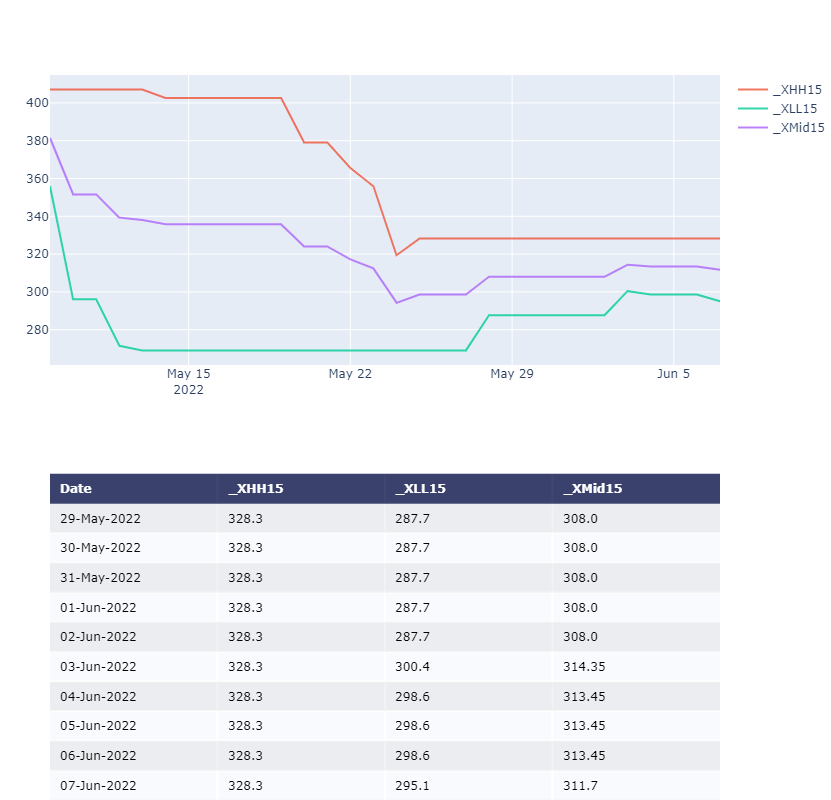

In [30]:
chartTitle1=f"{symbol}_HH-LL"
print(chartTitle1)
# colsToPlot=[  x for  x  in list_cols if x.startswith('_X') and ( x.startswith('_XMid')==False) ]
colsToPlot=[  x for  x  in list_cols if x.startswith('_X') ]
fig=manage_chart(df,colsToPlot,"",'')

pio.write_image(fig, f"{report_path}\\{chartTitle1}.png")
fig

BNBX_HH-LL
['_PctX_HtoL15', '_PctX_LtoH15']


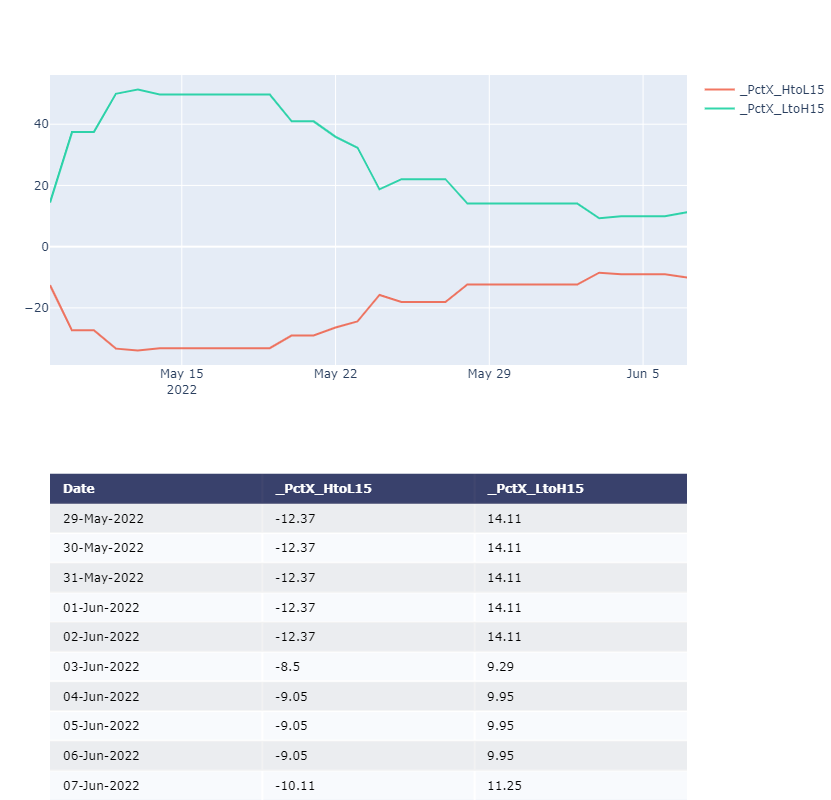

In [31]:
chartTitle2=f"{symbol}_PCT-HH-LL"
print(chartTitle1)
# colsToPlot=[  x for  x  in list_cols if x.startswith('_X') and ( x.startswith('_XMid')==False) ]
colsToPlot=[  x for  x  in list_cols if x.startswith('_PctX') ]
fig=manage_chart(df,colsToPlot,"",'')

pio.write_image(fig, f"{report_path}\\{chartTitle2}.png")
fig

BNBX_HH-LL
['_PctMidToH15', '_PctMidToL15']


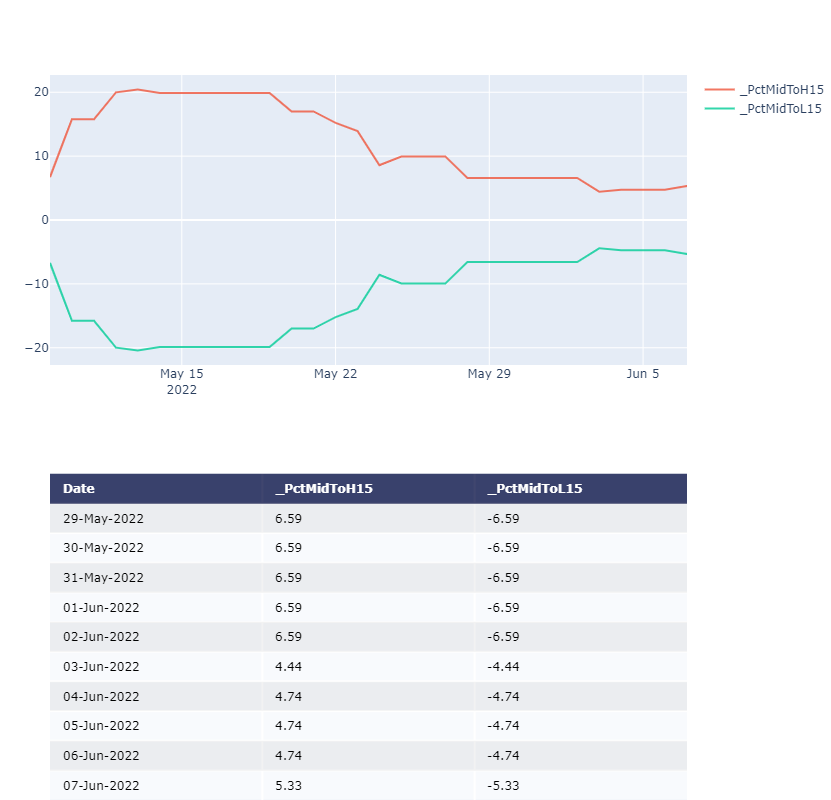

In [32]:
chartTitle3=f"{symbol}_PCT-Mid-HH"
print(chartTitle1)
# colsToPlot=[  x for  x  in list_cols if x.startswith('_X') and ( x.startswith('_XMid')==False) ]
colsToPlot=[  x for  x  in list_cols if x.startswith('_PctMidTo') ]
fig=manage_chart(df,colsToPlot,"",'')

pio.write_image(fig, f"{report_path}\\{chartTitle3}.png")
fig

In [33]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
def plot_mutiple_histrogram(df,cols_name,rows):
  fig=make_subplots(rows=len(cols_name),cols=1,)  
  for x in range(rows):
     # print(cols_name[x],"-",x+1)
     fig.add_trace(go.Histogram(x=df[cols_name[x]],name=cols_name[x]) ,row=x+1,col=1)
        
  fig.update_layout( autosize=True,width=800,height=800, paper_bgcolor="LightSteelBlue",legend_orientation="h")

  return fig

['_XHH15', '_XLL15', '_XMid15']


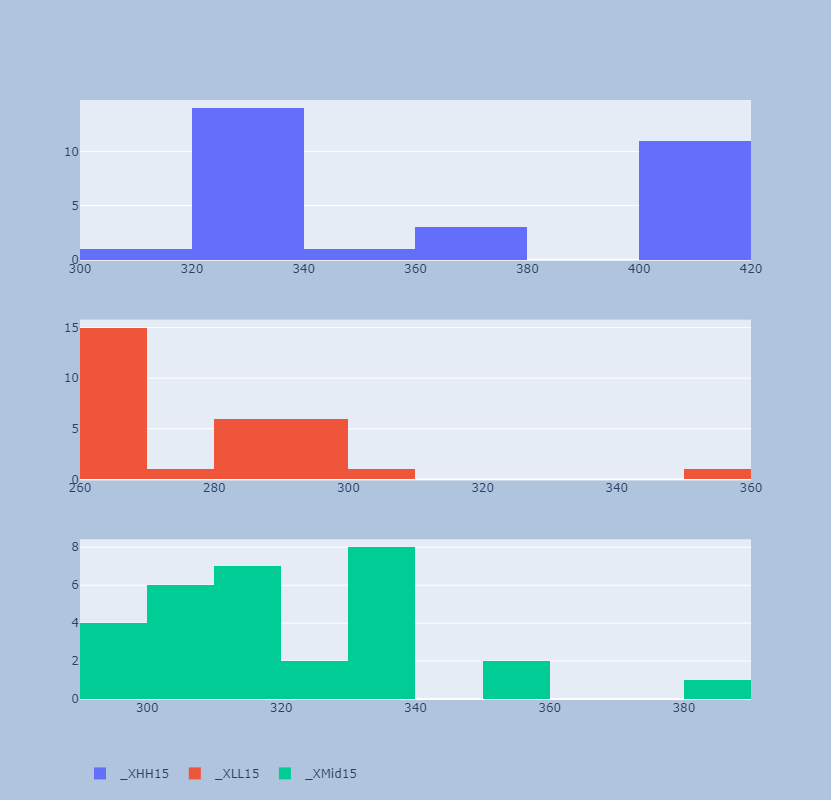

In [34]:
colsToDist_1=[  x for  x  in list_cols if x.startswith('_X') ]
print(colsToDist_1)
fig=plot_mutiple_histrogram(df,colsToDist_1,len(colsToDist_1))
pio.write_image(fig, f"{report_path}\\{symbol}_PriceDist.png")
fig

['_PctX_HtoL15', '_PctX_LtoH15']


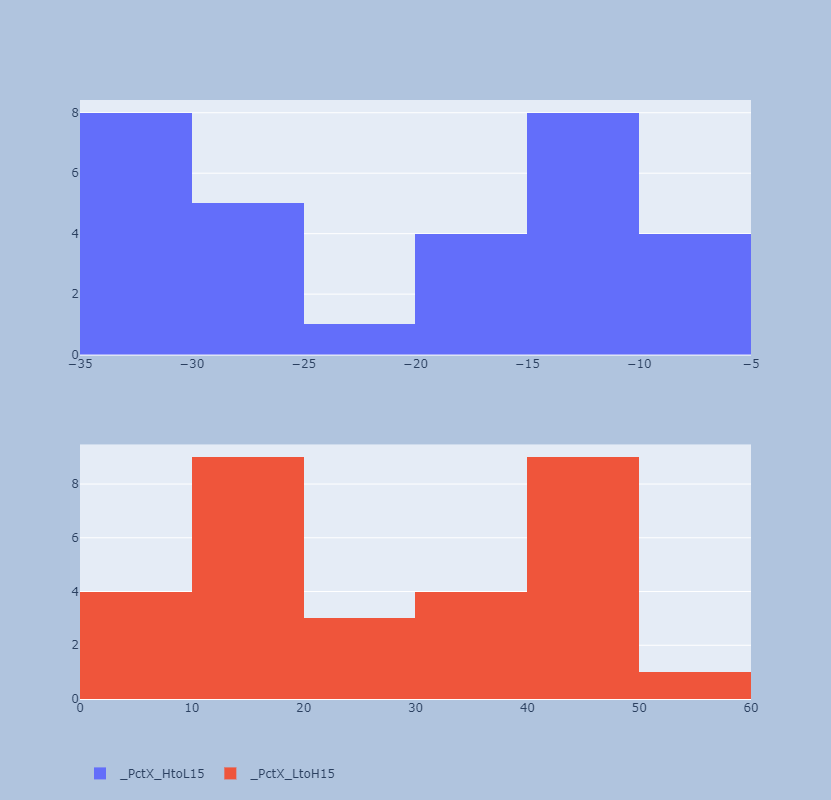

In [35]:
colsToDist_2=[  x for  x  in list_cols if x.startswith('_PctX') ]
print(colsToDist_2)
fig=plot_mutiple_histrogram(df,colsToDist_2,len(colsToDist_2))
pio.write_image(fig, f"{report_path}\\{symbol}_HL_PccDist.png")
fig

['_PctMidToH15', '_PctMidToL15']


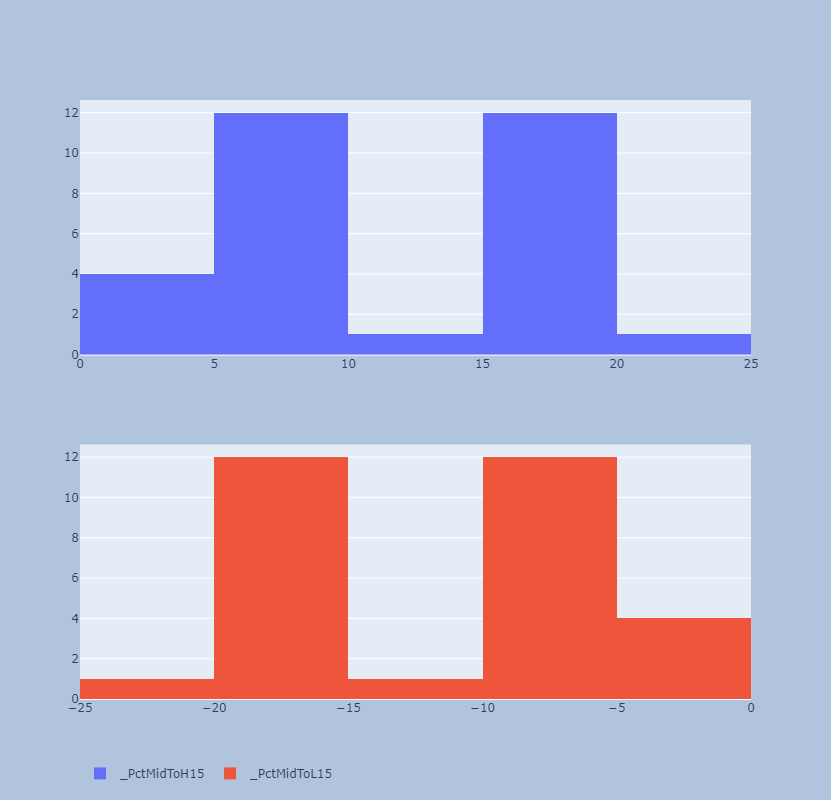

In [36]:
colsToDist_3=[  x for  x  in list_cols if x.startswith('_PctMid') ]
print(colsToDist_3)
fig=plot_mutiple_histrogram(df,colsToDist_3,len(colsToDist_3))
pio.write_image(fig, f"{report_path}\\{symbol}_Mid_PccDist.png")
fig

In [37]:
if df['Volume'].min()>=1000000:
   df['Volume']= df['Volume']/1000000
   print("Convert to Vol-M (Min Vol>1M)")

['Close', 'Volume']


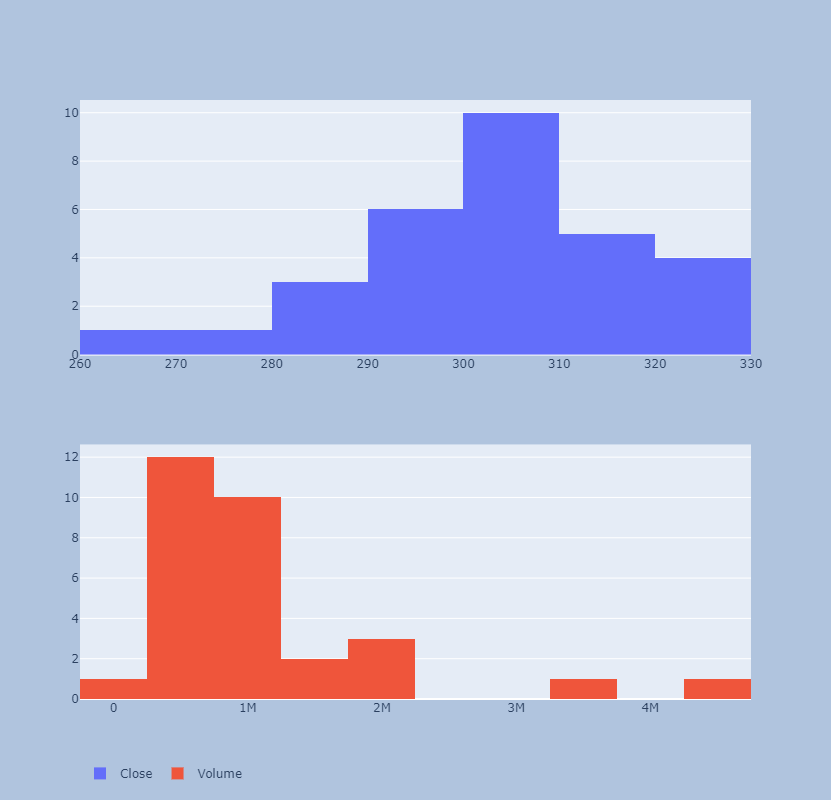

In [38]:



colsToDist_4=[ 'Close','Volume' ]
print(colsToDist_4)
fig=plot_mutiple_histrogram(df,colsToDist_4,len(colsToDist_4))
pio.write_image(fig, f"{report_path}\\{symbol}_PriceVol.png")
fig